# INFO-I590: Intro to Python
## Final Project - Phase 2

### Import dependencies

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Import data and impute missing values

In [2]:
data = pd.read_csv("breast-cancer-wisconsin.data", header = None, na_values = '?')
data.columns = ['scn','a2','a3','a4','a5','a6','a7','a8','a9','a10','class']
data["a7"] = data["a7"].fillna(data["a7"].median())

### Pare down dataset to features and target

In [4]:
X = data[["a2","a3","a4","a5","a6","a7","a8","a9","a10"]]
y = data["class"]

### Fit K-Means model to data

In [6]:
cluster = KMeans(n_clusters = 4, random_state = 42)
cluster.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [18]:
labels = cluster.predict(X)
print(labels)

[1 3 1 2 1 0 1 1 1 1 1 1 1 1 0 2 1 1 3 1 3 2 1 2 1 3 1 1 1 1 1 1 2 1 1 1 2
 1 3 3 2 2 0 2 2 1 3 1 1 2 2 1 2 0 3 2 2 2 3 2 2 1 2 2 1 2 1 3 0 1 1 2 1 3
 2 1 1 1 1 1 1 1 1 1 0 2 3 0 1 1 1 1 1 1 1 1 1 1 2 0 2 1 1 1 0 1 3 0 1 3 1
 3 3 0 1 1 1 0 1 1 1 1 0 3 0 1 3 1 3 1 1 1 0 1 1 1 1 1 1 1 1 1 3 1 1 1 3 1
 1 0 1 3 2 1 1 3 1 1 1 0 3 1 1 1 1 1 0 2 1 1 1 1 1 0 3 0 1 2 1 3 1 1 1 0 3
 1 0 0 0 1 0 0 1 1 1 1 3 1 1 1 0 3 1 1 1 0 2 1 1 1 0 0 1 0 0 2 1 1 2 1 1 0
 1 3 3 1 3 2 1 0 3 0 2 3 1 1 0 2 0 3 1 1 1 1 1 1 0 3 1 1 1 3 3 0 2 3 1 1 1
 3 3 0 0 3 2 1 3 3 2 1 3 1 3 1 1 1 1 1 1 3 1 1 3 3 3 0 0 1 2 0 1 1 2 3 1 3
 2 1 1 3 2 1 0 1 3 3 1 1 2 1 1 1 2 1 1 2 3 0 1 3 3 1 1 3 1 1 3 1 2 3 3 1 1
 3 3 1 3 1 1 3 3 1 1 1 0 1 1 1 2 3 1 1 2 0 1 1 1 0 2 3 0 3 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 3 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 2 1 3 1 3 1 1 1 1 0 1 1 1 0 1 2 1 1 1 1 1 1 3 3 2 1 1 1 3 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 3 2 1 1 1 1 1 1 1 2 3 3 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 0 1 1 1 0 2 1 1 3 1 

### Calculate and print centroids

In [8]:
centroids = cluster.cluster_centers_

In [9]:
print(centroids)

[[6.7625     8.3875     8.425      7.75       6.775      9.2125
  7.375      7.7375     3.7875    ]
 [2.94493392 1.24449339 1.36563877 1.29295154 2.03964758 1.28414097
  2.06167401 1.20044053 1.07709251]
 [7.46478873 7.02816901 6.67605634 4.1971831  5.53521127 3.30985915
  5.38028169 6.81690141 2.30985915]
 [7.23404255 4.85106383 5.04255319 4.86170213 4.11702128 9.38297872
  5.26595745 3.78723404 1.64893617]]


### Calculate Inertia

In [13]:
# Initial inertia calculation
inertia = cluster.inertia_
print(round(inertia,4))

14983.7891


In [19]:
# Create a range of 1 to 15 or more...
ks = range(1,15)
inertias = []

In [21]:
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(X)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

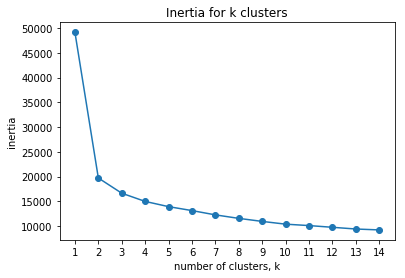

In [23]:
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.title('Inertia for k clusters')
plt.xticks(ks)
plt.show()

Good clustering is a tradeoff between inertia and number of clusters. Based on the above plot, the optimal number of clusters is probably around 5 clusters. If we allow for more clusters, the inertia will certainly be reduced, but a choice of 5 for the number of clusters appears to be a reasonable middle ground in the 'elbow' of the plot.

### Revise Data Variation

In [84]:
sd = []
for i in list(X.columns):
    sd.append(str(round(X[i].std(),4)))
labels = ['0','a2','a3','a4','a5','a6','a7','a8','a9','a10']

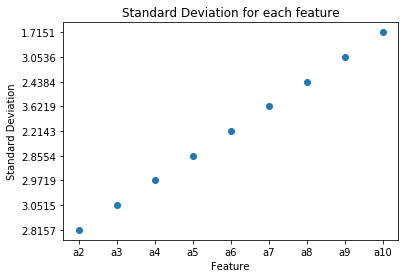

In [87]:
fig, ax = plt.subplots()
plt.plot(sd,'o')
ax.set_xticklabels(labels)
plt.xlabel('Feature')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation for each feature')
plt.show()

Although the above graphic is not ideal for visualizing the standard deviations of each feature, careful review of the graph suggests that 'a3', 'a7', and 'a9' have the highest variances. 'a4' and 'a5' are not far from consideration as well.

### Implement Normalization

In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters = 5, random_state = 42)
pipeline = make_pipeline(scaler, kmeans)

In [37]:
# Use pipeline to fit and predict model
pipeline.fit(X)
labels = pipeline.predict(X)

In [44]:
labels

array([0, 4, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 4, 0, 4, 2,
       0, 2, 0, 4, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 4, 4, 3, 2, 3, 2,
       2, 0, 2, 0, 0, 2, 4, 0, 2, 1, 4, 2, 2, 2, 4, 4, 2, 0, 2, 2, 0, 1,
       0, 2, 1, 0, 0, 1, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 2, 0, 0, 4, 1, 4, 4, 3, 0, 4,
       0, 4, 4, 3, 0, 0, 0, 1, 0, 0, 0, 0, 3, 4, 3, 0, 4, 0, 4, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 2, 1, 0, 4, 3, 0,
       0, 4, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 1, 4, 3,
       0, 2, 0, 4, 0, 0, 0, 3, 4, 0, 3, 1, 3, 0, 3, 3, 0, 0, 0, 0, 2, 0,
       0, 0, 3, 3, 0, 0, 0, 3, 2, 0, 0, 0, 1, 3, 0, 3, 3, 2, 0, 0, 3, 0,
       0, 3, 0, 4, 4, 0, 2, 2, 0, 3, 4, 3, 2, 4, 0, 0, 1, 2, 1, 4, 0, 0,
       0, 0, 0, 0, 3, 4, 0, 0, 0, 4, 4, 3, 2, 4, 0, 0, 0, 2, 4, 3, 3, 4,
       3, 0, 4, 4, 1, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 4, 4, 3,
       1, 0, 2, 3, 0, 0, 2, 4, 0, 3, 2, 0, 0, 4, 2,

In [51]:
# Find and print centroids
k = kmeans.fit(X)
centroids = k.cluster_centers_
print(centroids)

[[1.77777778 1.10740741 1.19259259 1.13703704 1.97037037 1.24814815
  2.00740741 1.06296296 1.07407407]
 [7.37623762 5.23762376 5.37623762 4.58415842 4.40594059 9.35643564
  5.30693069 3.78217822 1.68316832]
 [7.32786885 7.29508197 6.81967213 4.52459016 5.70491803 3.3442623
  5.62295082 7.50819672 2.2295082 ]
 [6.65333333 8.30666667 8.36       8.09333333 6.70666667 9.18666667
  7.41333333 8.         3.89333333]
 [4.77604167 1.53645833 1.73958333 1.609375   2.1875     1.36458333
  2.21875    1.44270833 1.16145833]]
